In [34]:
#importing necessary libraries
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#reading the dataset
sports_data = pd.read_csv('Sports_Dataset_50k.csv')
print(sports_data.head())


   MatchID   Team1   Team2  Team1_Score  Team2_Score        Date  \
0     1352  Wolves  Eagles            3            3  2022-08-31   
1     4843  Sharks   Hawks            0            3  2020-02-24   
2     4162   Hawks  Tigers            3            2  2020-05-16   
3     1234   Lions  Wolves            3            1  2023-07-22   
4     4279   Lions   Hawks            0            1  2021-08-24   

         Location Weather  Attendance  Team1_Possession  ...  \
0     Morganmouth   Sunny     14303.0                58  ...   
1  New Robertfurt   Rainy     33892.0                45  ...   
2  New Sheilaport   Snowy      6215.0                57  ...   
3   New Seanville   Windy     40578.0                56  ...   
4     Michaelport   Snowy     46450.0                57  ...   

   Yellow_Cards_Team1  Yellow_Cards_Team2  Red_Cards_Team1  Red_Cards_Team2  \
0                   0                   0                1                1   
1                   4                   3       

In [36]:
#Attributes of the dataset
print(sports_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MatchID                50000 non-null  int64  
 1   Team1                  50000 non-null  object 
 2   Team2                  50000 non-null  object 
 3   Team1_Score            50000 non-null  int64  
 4   Team2_Score            50000 non-null  int64  
 5   Date                   50000 non-null  object 
 6   Location               50000 non-null  object 
 7   Weather                50000 non-null  object 
 8   Attendance             45000 non-null  float64
 9   Team1_Possession       50000 non-null  int64  
 10  Team2_Possession       50000 non-null  int64  
 11  Shots_On_Target_Team1  45000 non-null  float64
 12  Shots_On_Target_Team2  45000 non-null  float64
 13  Fouls_Team1            50000 non-null  int64  
 14  Fouls_Team2            50000 non-null  int64  
 15  Ye

In [37]:
#Summary of the dataset
print(sports_data.describe(include='all'))

             MatchID  Team1  Team2   Team1_Score   Team2_Score        Date  \
count   50000.000000  50000  50000  50000.000000  50000.000000       50000   
unique           NaN      6      6           NaN           NaN        1770   
top              NaN  Hawks  Hawks           NaN           NaN  2023-07-19   
freq             NaN   8619   8516           NaN           NaN          49   
mean     2991.156640    NaN    NaN      2.128660      1.999420         NaN   
std      1154.799802    NaN    NaN      1.899521      1.415733         NaN   
min      1000.000000    NaN    NaN      0.000000      0.000000         NaN   
25%      1990.000000    NaN    NaN      1.000000      1.000000         NaN   
50%      2982.500000    NaN    NaN      2.000000      2.000000         NaN   
75%      3989.000000    NaN    NaN      3.000000      3.000000         NaN   
max      4999.000000    NaN    NaN     19.000000      4.000000         NaN   

             Location Weather    Attendance  Team1_Possession  

In [38]:
#Checking for missing values
print(sports_data.isnull().sum())

MatchID                     0
Team1                       0
Team2                       0
Team1_Score                 0
Team2_Score                 0
Date                        0
Location                    0
Weather                     0
Attendance               5000
Team1_Possession            0
Team2_Possession            0
Shots_On_Target_Team1    5000
Shots_On_Target_Team2    5000
Fouls_Team1                 0
Fouls_Team2                 0
Yellow_Cards_Team1          0
Yellow_Cards_Team2          0
Red_Cards_Team1             0
Red_Cards_Team2             0
PlayerID                    0
PlayerName                  0
Position                    0
Goals                    5000
Assists                  5000
Minutes_Played              0
dtype: int64


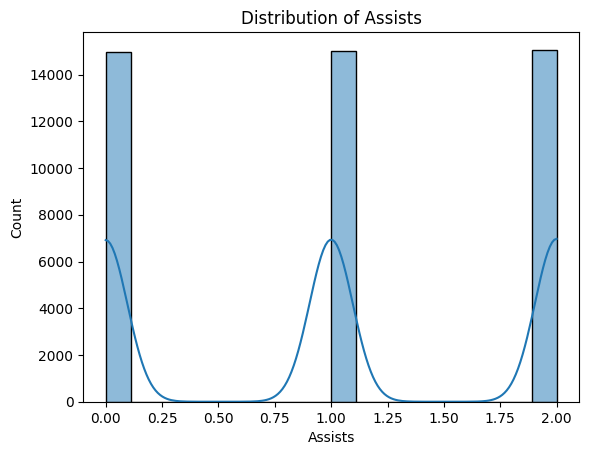

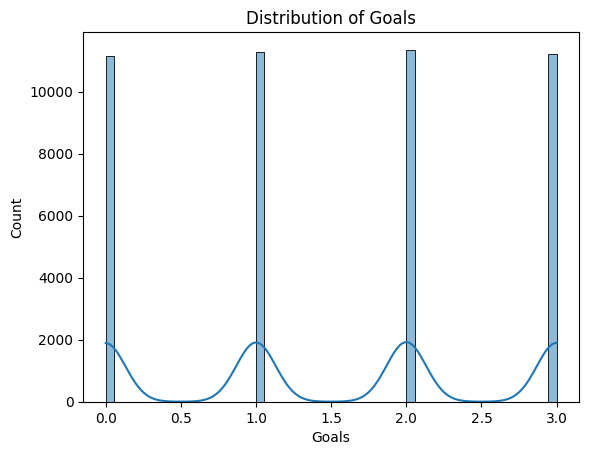

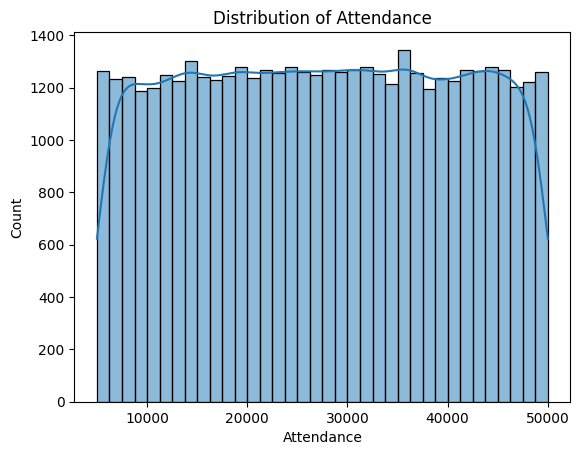

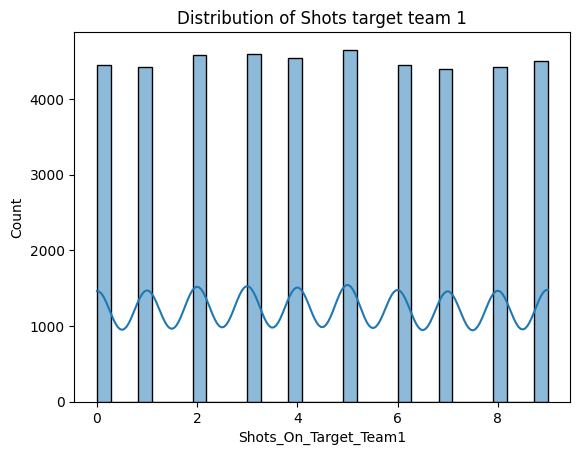

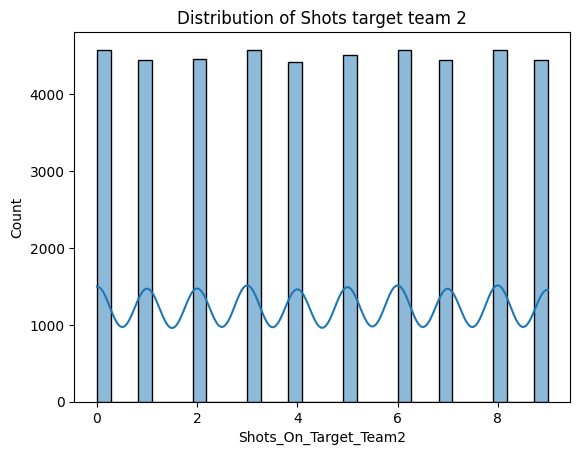

In [39]:


# Visualize the distribution of the 'Assists' column
sns.histplot(df['Assists'], kde=True)
plt.title('Distribution of Assists')
plt.show()

sns.histplot(df['Goals'], kde=True)
plt.title('Distribution of Goals')
plt.show()

sns.histplot(df['Attendance'], kde=True)
plt.title('Distribution of Attendance')
plt.show()

sns.histplot(df['Shots_On_Target_Team1'], kde=True)
plt.title('Distribution of Shots target team 1')
plt.show()

sns.histplot(df['Shots_On_Target_Team2'], kde=True)
plt.title('Distribution of Shots target team 2')
plt.show()

In [40]:
#Filling nulls

#Using mean for attendance and median for goals
sports_data['Assists'] = sports_data['Assists'].fillna(sports_data['Assists'].median())
sports_data['Goals'] = sports_data['Goals'].fillna(sports_data['Goals'].median())
sports_data['Attendance'] = sports_data['Attendance'].fillna(sports_data['Attendance'].mean())
sports_data['Shots_On_Target_Team1'] = sports_data['Shots_On_Target_Team1'].fillna(sports_data['Shots_On_Target_Team1'].median())
sports_data['Shots_On_Target_Team2'] = sports_data['Shots_On_Target_Team2'].fillna(sports_data['Shots_On_Target_Team2'].median())

In [41]:
print(sports_data.isnull().sum())

MatchID                  0
Team1                    0
Team2                    0
Team1_Score              0
Team2_Score              0
Date                     0
Location                 0
Weather                  0
Attendance               0
Team1_Possession         0
Team2_Possession         0
Shots_On_Target_Team1    0
Shots_On_Target_Team2    0
Fouls_Team1              0
Fouls_Team2              0
Yellow_Cards_Team1       0
Yellow_Cards_Team2       0
Red_Cards_Team1          0
Red_Cards_Team2          0
PlayerID                 0
PlayerName               0
Position                 0
Goals                    0
Assists                  0
Minutes_Played           0
dtype: int64


In [26]:
df = sports_data
from scipy import stats

# Detect anomalies using Z-score for 'Team1_Score' and 'Minutes_Played'
z_scores = stats.zscore(df[['Team1_Score', 'Minutes_Played']])
anomalies_z = (abs(z_scores) > 3).any(axis=1)  # Z-score threshold of 3 for anomalies

# Using IQR for anomaly detection in 'Attendance'
Q1 = df['Attendance'].quantile(0.25)
Q3 = df['Attendance'].quantile(0.75)
IQR = Q3 - Q1
anomalies_iqr = ((df['Attendance'] < (Q1 - 1.5 * IQR)) | (df['Attendance'] > (Q3 + 1.5 * IQR)))

# Replace anomalies with median or nearest valid value
df.loc[anomalies_iqr, 'Attendance'] = df['Attendance'].median()

In [42]:
sports_data.head()

MatchID   Team1   Team2  Team1_Score  Team2_Score        Date  \
0     1352  Wolves  Eagles            3            3  2022-08-31   
1     4843  Sharks   Hawks            0            3  2020-02-24   
2     4162   Hawks  Tigers            3            2  2020-05-16   
3     1234   Lions  Wolves            3            1  2023-07-22   
4     4279   Lions   Hawks            0            1  2021-08-24   

         Location Weather  Attendance  Team1_Possession  ...  \
0     Morganmouth   Sunny     14303.0                58  ...   
1  New Robertfurt   Rainy     33892.0                45  ...   
2  New Sheilaport   Snowy      6215.0                57  ...   
3   New Seanville   Windy     40578.0                56  ...   
4     Michaelport   Snowy     46450.0                57  ...   

   Yellow_Cards_Team1  Yellow_Cards_Team2  Red_Cards_Team1  Red_Cards_Team2  \
0                   0                   0                1                1   
1                   4                   3                1                0   
2                   3                   0                1                0   
3                   0                   2                1                1   
4                   2                   1                0                0   

   PlayerID       PlayerName    Position  Goals  Assists  Minutes_Played  
0      3620    John Martinez  Midfielder    3.0      1.0              63  
1      3655   Lisa Armstrong     Forward    0.0      1.0              84  
2      3949  Joshua Bush Jr.    Defender    0.0      2.0              32  
3      3659      Laura Cohen  Goalkeeper    1.0      0.0              83  
4      2482    Robert Melton     Forward    3.0      1.0              68  

[5 rows x 25 columns]

In [43]:
numerical_columns = ['Attendance', 'Team1_Score', 'Team2_Score', 'Team1_Possession', 'Team2_Possession', 'Goals', 'Assists', 'Minutes_Played']
for col in numerical_columns:
    print(f"{col} outliers:")
    print(sports_data[col][(sports_data[col] < sports_data[col].quantile(0.01)) | 
                           (sports_data[col] > sports_data[col].quantile(0.99))])

Attendance outliers:
72       49901.0
99       49981.0
118       5219.0
289      49901.0
492      49721.0
          ...   
49514    49948.0
49536    49534.0
49727     5352.0
49772    49519.0
49876     5419.0
Name: Attendance, Length: 998, dtype: float64
Team1_Score outliers:
373      19
406      14
449      16
616      17
828      15
         ..
49082    19
49358    19
49405    14
49782    13
49857    17
Name: Team1_Score, Length: 500, dtype: int64
Team2_Score outliers:
Series([], Name: Team2_Score, dtype: int64)
Team1_Possession outliers:
Series([], Name: Team1_Possession, dtype: int64)
Team2_Possession outliers:
Series([], Name: Team2_Possession, dtype: int64)
Goals outliers:
Series([], Name: Goals, dtype: float64)
Assists outliers:
Series([], Name: Assists, dtype: float64)
Minutes_Played outliers:
74       112
241      125
385      103
589      155
608      134
        ... 
49632    131
49824    132
49834    125
49969    173
49972    156
Name: Minutes_Played, Length: 500, dtype: int